<a href="https://colab.research.google.com/github/Jeongmin0658/kentech_tutorial/blob/main/Version_2023_summer/gahyun/3_%EC%9C%BC%EC%9C%BC%EC%9C%BC%EC%9D%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part III. Distributing points

# 1 - Distribution of random points in 1D

[6.92149175 9.6395881  9.27096257 7.69925148 7.49653003 5.5429163
 8.62367808 9.18906748 9.68712487 8.79281175 9.94464875 9.67032765
 7.66019883 5.7483138  6.83321854 5.52428382 5.7367194  8.46410293
 9.92679057 5.37598642 7.90222558 9.17152179 6.50043014 9.51850281
 8.6580241  9.08377943 6.79527302 5.82635193 6.39454384 6.37774257
 9.28452069 8.02749074 9.41641895 8.44826282 6.76528257 6.9333636
 5.72038666 5.19190235 9.76068976 9.33565256 8.75085217 6.31236424
 6.53071795 9.58334573 9.99844176 8.34589705 7.52598025 6.53624691
 5.45767929 9.00868354]


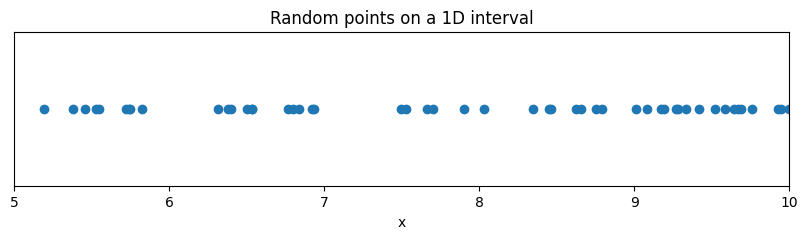

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def generate_random_points(lower_bound, upper_bound, num_points):
    return np.random.uniform(lower_bound, upper_bound, num_points)

# Test the function
# Feed in your numbers
lower_bound = 0  # Lower bound of the interval
upper_bound = 15  # Upper bound of the interval
num_points = 50  # Number of random points to generate
random_points = generate_random_points(lower_bound, upper_bound, num_points)

# print the random points
print(random_points)

# plot the points
plt.figure(figsize=(10, 2))
plt.scatter(random_points, np.zeros_like(random_points), marker='o')
plt.xlim([lower_bound, upper_bound])
plt.yticks([])  # Hide the y-axis
plt.xlabel('x')
plt.title('Random points on a 1D interval')
plt.show()


# 2 - Distributing random points in 2D

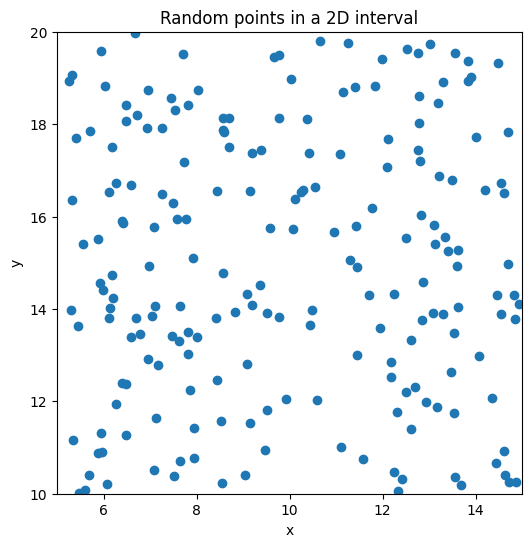

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def generate_random_points_2D(x_bounds, y_bounds, num_points):
    # Make your own function
    x_coords = generate_random_points(x_bounds[0],x_bounds[1], num_points)
    y_coords = generate_random_points(y_bounds[0],y_bounds[1], num_points)
    return x_coords, y_coords

# Test the function
# Here is the example of the bounds
x_bounds = [5, 15]  # Bounds for the x-coordinates
y_bounds = [10, 20]  # Bounds for the y-coordinates
num_points = 200  # Number of random points to generate

# Call the function
x_coords, y_coords = generate_random_points_2D(x_bounds, y_bounds, num_points)


# Plot the points
plt.figure(figsize=(6, 6))
plt.scatter(x_coords, y_coords, marker='o')
plt.xlim(x_bounds)
plt.ylim(y_bounds)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Random points in a 2D interval')
plt.show()


# 3 - Find pairs of points with an overlap

Below is an example where some of points overlap (within a certain distance). You will write a function to find those pairs.

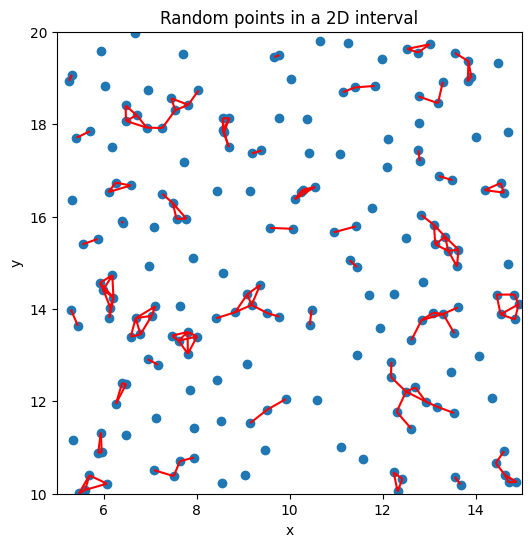

In [8]:
import math
from matplotlib import collections

def find_overlab_pairs(x_coords, y_coords, overlab_distance):
  overlab_pairs=[]
  num_points=len(x_coords)

  for i in range(0,num_points):
    x1=x_coords[i]
    y1=y_coords[i]

    for k in range(i + 1, num_points):
      x2=x_coords[k]
      y2=y_coords[k]

      dis=math.sqrt((x1-x2)**2 + (y1-y2)**2)

      if(dis <= overlab_distance):
        overlab_pairs.append([(x1,y1),(x2,y2)])

  return overlab_pairs

overlab_distance=0.5
overlab_pairs=find_overlab_pairs(x_coords,y_coords,overlab_distance)

lines=collections.LineCollection(overlab_pairs, color="red")

plt.figure(figsize=(6, 6))
plt.scatter(x_coords, y_coords, marker='o')
plt.gca().add_collection(lines)
plt.xlim(x_bounds)
plt.ylim(y_bounds)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Random points in a 2D interval')
plt.show()



# 4 - Generating random points without overlaps

In [ ]:
def generate_random_points_2D_no_overlab(x_bounds, y_bounds, num_points, overlab_distance):
    # Make your own function
    x_coords = []
    y_coords = []

    while num_points:
      x = np.random.uniform(x_bounds[0], x_bounds[1])
      y = np.random.uniform(y_bounds[0], y_bounds[1])

      x_coords.append(x)
      y_coords.append(y)

      overlab_pairs = find_overlab_pairs(x_coords, y_coords, overlab_distance)
      if overlab_pairs:
        del x_coords[-1]
        del y_coords[-1]
      else:
        num_points -= 1

    return x_coords, y_coords

overlab_distance = 0.25
x_coords, y_coords = generate_random_points_2D_no_overlab(x_bounds, y_bounds, num_points, overlab_distance)

overlab_pairs = find_overlab_pairs(x_coords, y_coords, overlab_distance)
lines = collections.LineCollection(overlab_pairs, color="red")

plt.figure(figsize=(6, 6))
plt.scatter(x_coords, y_coords, marker='o')
plt.gca().add_collection(lines)
plt.xlim(x_bounds)
plt.ylim(y_bounds)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Random points in a 2D interval')
plt.show()
